# Training Models 





1)  __Linear Regression:__ the simplest models that use two different ways to train it: 

- Use direct *"closed-form"* equation that directly computes the model parameters that minimize the cost function and get best fitted model to the training set 
  
- Using *Gradient Descent*, an iterative optimization apporach that tweaks the model parameters to minimize the training set, 3 variants of __Gradient Descent (Batch GD, Mini-batch GD, Stochastic GD)__
    
2)  __Polynomial Regression:__ more coplex model that can fit nonlinear datasets since this model has more parameters than Linear Rregression, reduce the risk of overfitting the training set by using learning curves and reqularizaiton techniques 
Two models used for classification tasks: **Logistic Regression** and **Softmax Regression** 

# Linear Regression

Linear model makes prediction by simply computing weighted sum of the input features plus a constant called **bias/intercept term** 

### Linear Regression model prediction:


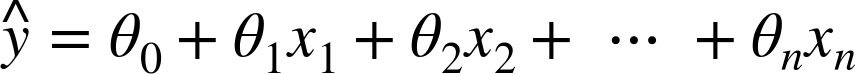

In [7]:
from IPython.core.display import Image
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/LM_model_prediction.png')

### Linear Regression model prediction (vectorized form):



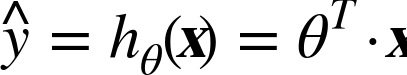

In [10]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/LM_model_prediction2.png')

### By using Root Mean Square Error(RMSE), to measure performance of the regression model and how well or poorly the model fit the training data
To achive that we need to find value of parameter vector θ that minimizes the RMSE.

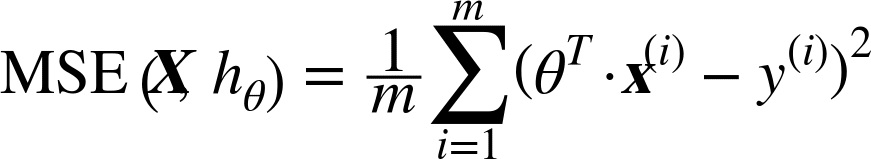

In [12]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/RMSE.png')

We calculate the __Mean Square Error(MSE)__ instead of **RMSE** that leads to the same result, minimizing the funciton also minimizes its square root. 




# The Normal Equation:

A mathematical equation that find value of __vector parameter__ that minimizes the cost function, a closed-form solution 

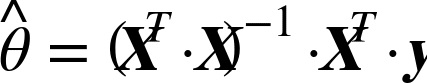

In [14]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/NE.png')

Normal Equation Example:

In [ ]:
#generating dataset 
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [19]:
# calculate estimated θ using inv() funciton from NumPy linear Algebra(np.linalg) to compute inverse matrix 
#and dot() method for matrix multiplication 
X_b = np.c_[np.ones((100, 1)), X] # add bias/x0 = 1 to each instance
#apply Normal Equaion
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.85948527],
       [3.08280073]])

In [27]:
#now we can make prediction using θ-hat 

X_new = np.array([[0], [2]]) #create array with 2 rows and 1 column
# add bias/x0 = 1 to each instance ,2 rows with 2 columns 
#the firs columns filled with ones and second with X_new column [0] and [2]
#np.c_ :object of class, slice objects to concatenation along the second axis.
X_new_b = np.c_[np.ones((2, 1)), X_new] 
#dot product, multiplication of two arrays, 1D array
y_predict = X_new_b.dot(theta_best) 
y_predict

array([[ 3.85948527],
       [10.02508674]])

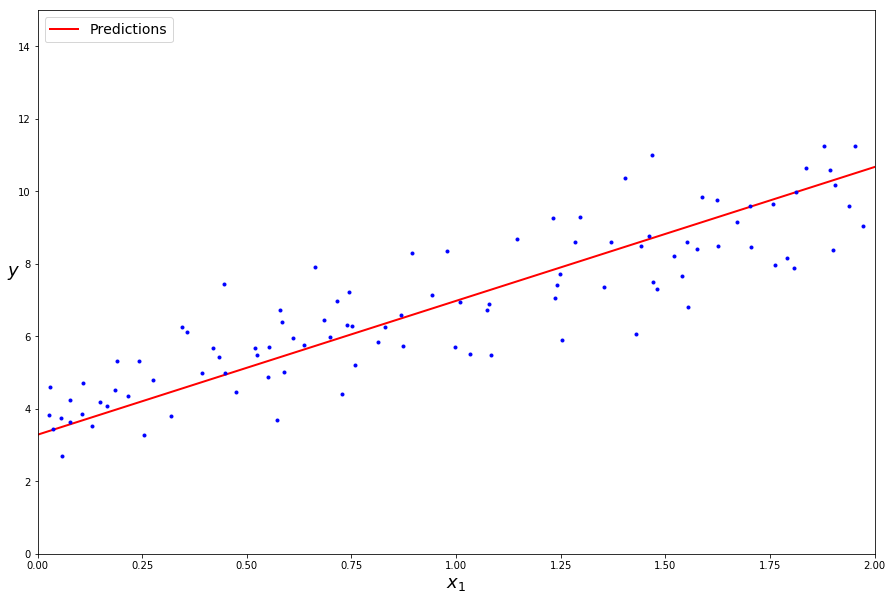

In [164]:
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(X_new, y_predict, "r-",linewidth=2, label="Predictions") #read plot
plt.plot(X, y, "b.") #b. blue color 
plt.axis([0, 2, 0, 15]) #change the axis for y_predict
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


The equivalent code using **Scikit-learn** will be as per the following:

In [51]:
from sklearn.linear_model import LinearRegression
#using LInearRegression module
lin_reg = LinearRegression()
#fitting the model
lin_reg.fit(X,y)
#check the coefficiants, intercept b0 and gradient b1
lin_reg.intercept_, lin_reg.coef_
#prediction, given X_new observations as test data
lin_reg.predict(X_new)

array([[ 3.85948527],
       [10.02508674]])

<br>

# Gradient Descent

- __GD__ is very genetic optimization algorithm capable of finding optimal solutions to wide range of problems, to tweak parameters iteratively in order to minimize a cost funtion by fining __minimal__.



- __GD__ measures the local gradient of the error funciton with regards to the __parameter vector $θ$__, and it goes in direction of *descending gradient*, when **GD =0 ---> minimum reached** 



- **Random initialization** by filling **parameter vector $θ$** with random values and imporve it by takeing small step at a time, each of these small steps attempts to *decrease* the cost function.



- **Learning rate** is an important *hyperparameter* in GD that determine the **size of the steps**, the smallest the learning rate is , the longer time the algorithm will take to go through many iterations 

<br>

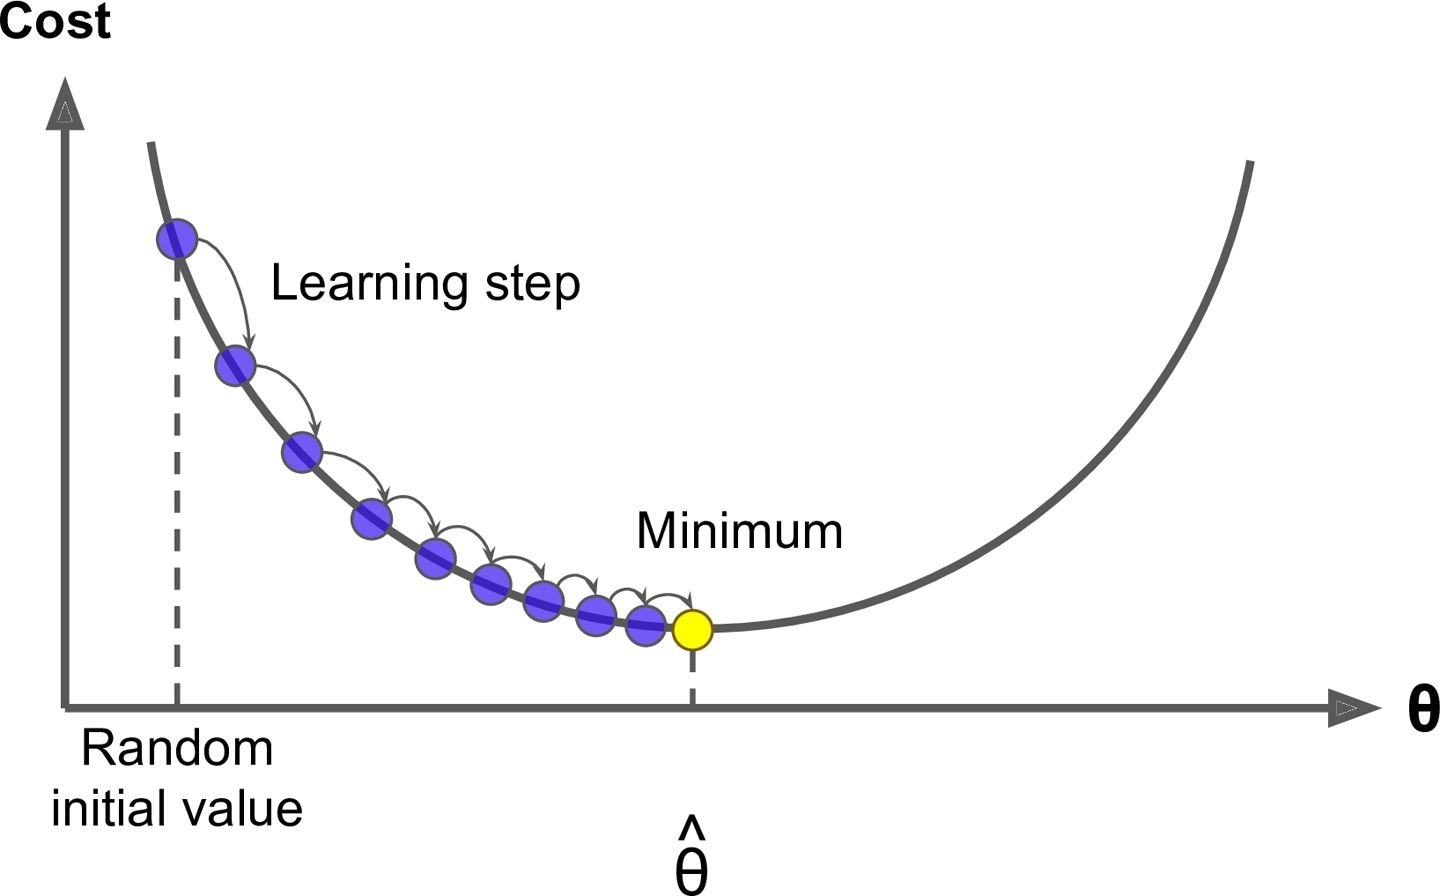

In [52]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/GD1.png')

As per the below figure, two main challenges with **Gradient Descent**:

 - If **random initialization** starts the algorithm on the *left*, then it will converge to **local minimum** that is not good as the **global minimum**
 
 - If the algorithm starts on the *right* then it will take very **long time** to cross the plauteau 


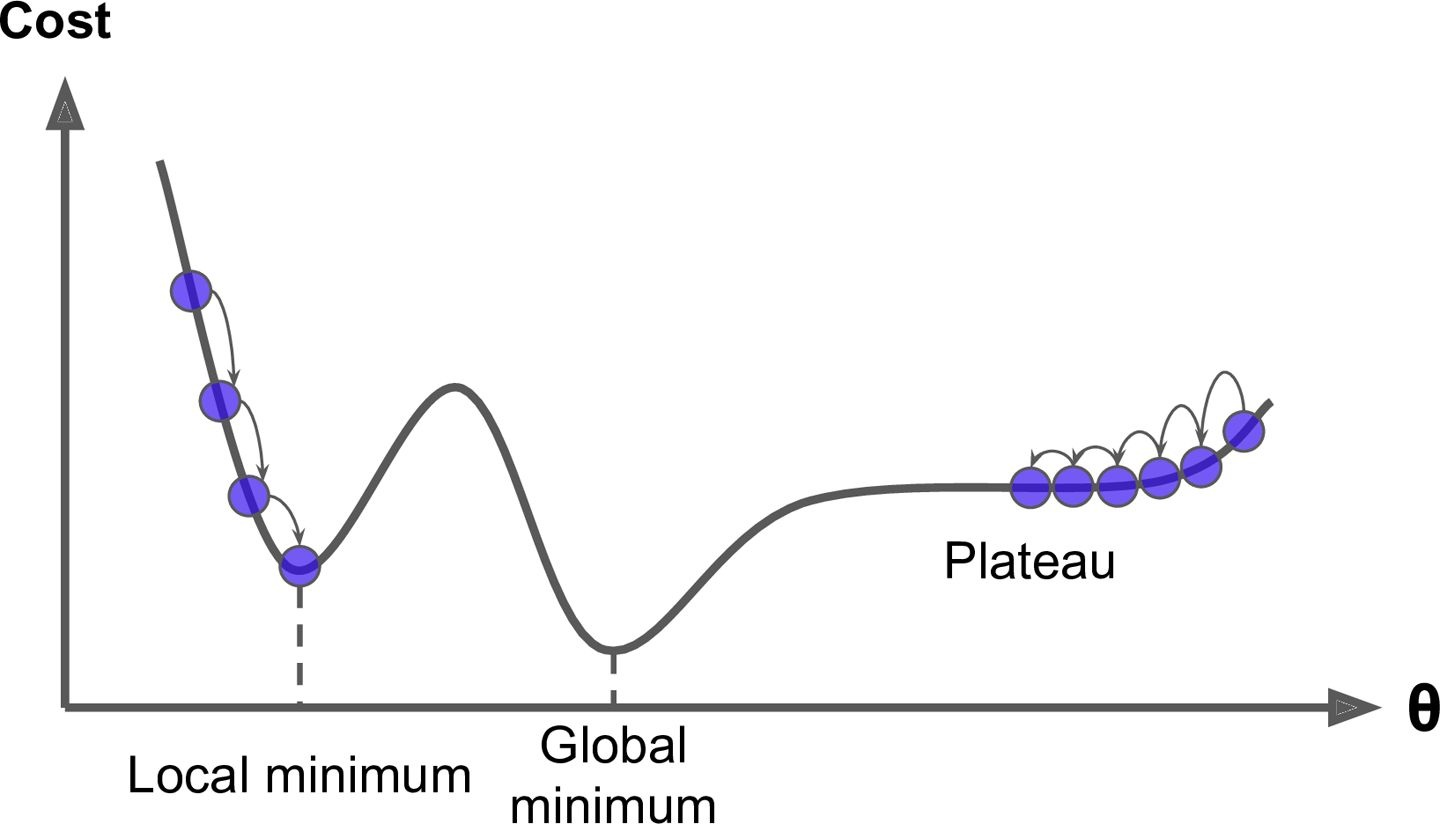

In [53]:
 
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/GD2.png')
    

The **cost function** has the shape of a bowl, but it can be an elongated bowl if the features have very different scales, check the below figure that tells:

- **on the left:** *GD* on training set where features 1 and 2 have **same scale**, the *GD* goes straight toward the **minimum** to qulckly reach it 

- **on the right:** *GD* on training set where features 1 and 2 have **different scale**, feature 1 has smaller values than feature 2, the *GD* first goes in direction almost *orthogonal* to the direction of global minimum and end up with long march down to the **minimum** but will take longe time

**Training model** is searching for *combination of model parameters* that minimizes **cost function** over the training set, which means that the more parameters a model has, the more dimentions this space has and the harder the search is.


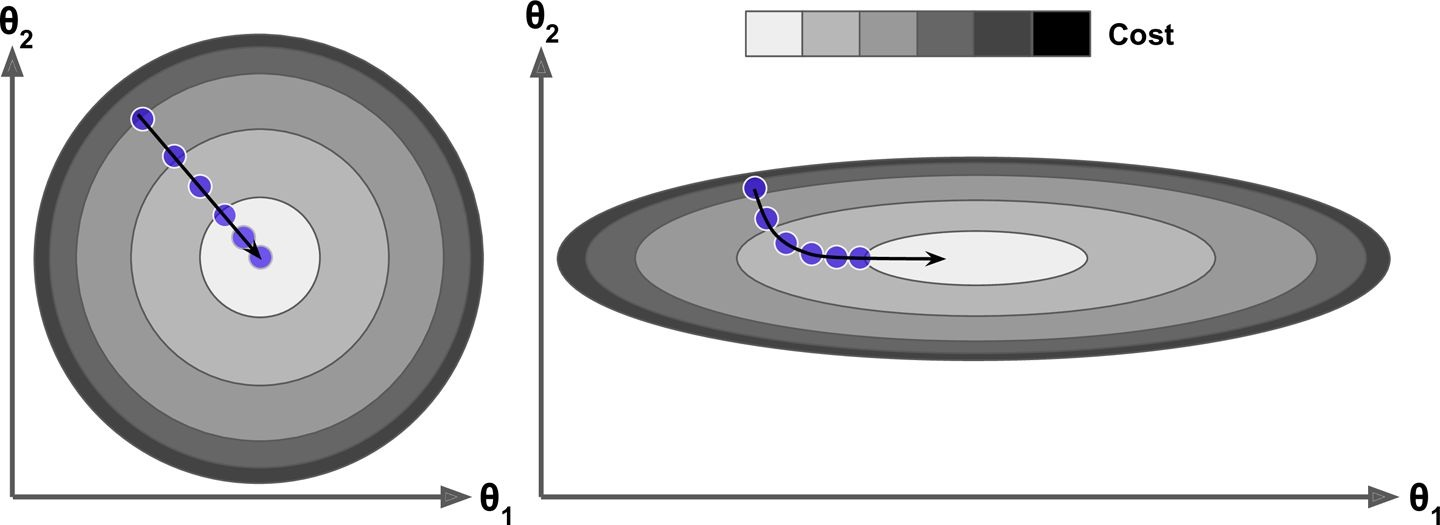

In [60]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/GD3.png')


## Batch Gradient Descent

- Its calculations over the full training set $X$, at each **Gradient Descent step**, **Batch Gradient Descent** use the *whole batch* of training data to compute all the gradients at **every step**, its **slow** Gradient Descent algorithm since it will be slow on very large training sets.


- **Partial derivative:** Calculate how much the cost funciton will change if parameter vector $θ$ changed little bit.


- We can calculate the **partial derivatives** of the **cost function** by computing all gradients *together* instead of individually, to get Gradient vector of the cost function for each model parameter as per the following equation: 

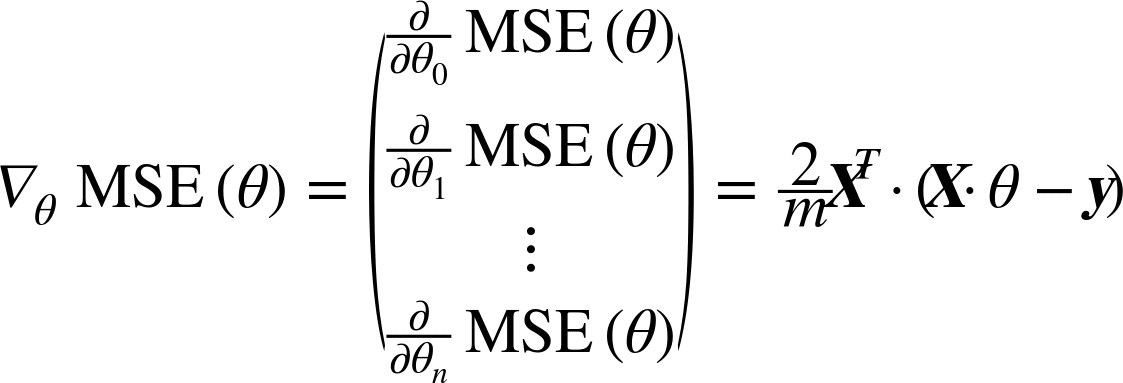

In [90]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/BGD1.png')


Then, the Gradient Descent **next step** will be calculated as per the below equation.

*Subtracting* **Gradient vector** from parameter vector $θ$ to make steps to down hill, but to determine the size of the down hill step, we should *multiply* the Gradient vector by the **learning rate** $η$

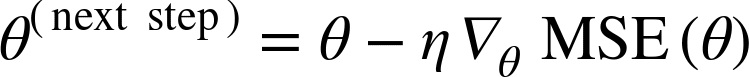

In [91]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/BGD2.png')


The implementatoin of this algorithm:

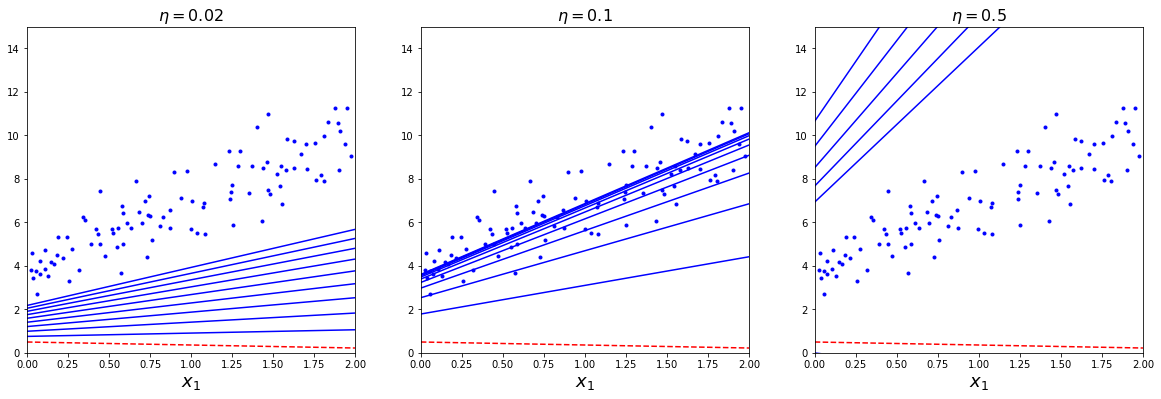

In [115]:
#theta_path_bgd = []

def plot_Batch_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b) # training set 
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        #The first 10 steps of GD
        if iteration < 10: 
            #dot product, multiplication of two arrays, 1D array
            y_predict = X_new_b.dot(theta)
            #LR line ,color = blue, else dashed red
            style = "b-" if iteration > 0 else "r--" 
            #plot 2 arrays given style condiction
            plt.plot(X_new, y_predict, style)
            
        #Calculate the Gradient vector of the cost function 
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        #Calculate the Gradient Descent step
        theta = theta - eta * gradients
        #if theta_path is not None:
            #theta_path.append(theta)
    #label first feature
    plt.xlabel("$x_1$", fontsize=18)
    #change the coordinates of x and y features
    plt.axis([0, 2, 0, 15])
    #plot learning rate value as titel for each suplot
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    np.random.seed(42)

theta = np.random.randn(2,1)  # random initialization
#figure size, vertical = 10 and horizontal =6
plt.figure(figsize=(20,6))
#first suplot with 0.02 learning rate
plt.subplot(131); plot_Batch_gradient_descent(theta, eta=0.02)
#plt.ylabel("$y$", rotation=0, fontsize=18)
##first suplot with 0.1 learning rate
plt.subplot(132); plot_Batch_gradient_descent(theta, eta=0.1)#, theta_path=theta_path_bgd
#first suplot with 0.5 learning rate
plt.subplot(133); plot_Batch_gradient_descent(theta, eta=0.5)

plt.show()

- Learning rate is **too low** $η$ = $0.02$ :the algorithm will reach solution but it will take a long time or maybe still far away from the **optimal solution** when the algorithm stops, this refers to the number of iterations for small steps. 


- Learning rate is **good** $η$ = $0.1$: the value looks very good in just few iterations ***(10 iterations)*** and the algorithm has already **converged** to the solution.


- Learning rate is **too high** $η$ $0.5$: the value doesnt look very good as the algorithm diverges by jumping all over the place adn getting further away from the solution at every step of the iteration, wasting time while the model parameters do not change anymore



***Q1: How to find a good learning rate?*** 

Well, by using **grid search**, but its recommended to *limit the number of iterations* so the grid search can eliminate models that takes too long to converge

***Q2: How to fid a good number of iterations?***

Well!!, set a *very large number of iterations* but with a condition, when the **length/norm** of GD vector is getting **tiny**, and become *smaller* than a tiny number $ε$ called tolerance ---> interrupt the algorithm becouse Gradient Descent has almost reached the **minimum** 

In [159]:
theta

array([[3.87943771],
       [3.13164986]])

**Comparasion:** 

**Batch Gradient Descent** got the same $θ$ results as **Normal Equation**, however one point to be noted that training a **linear Regression** model when there are hundreads of thousands of features is **much faster** using Gradient Descent than using Normal Equation. 

<br>

## Stochastic Gradient Descent

- It's calculations over picking a random instance in the training set $X$ at every step and compute the gradients based only on that single instance, **SGD algorithm is much faster than BGD** and will be useful to apply on huge training datasets since it has very little data to manipulaate at every iteration, unlike BGD that computes all gradients for whole training dataset every iteration!.


- Unlike **BDG cost function** that decreasing until reaches the *minimum*, **SDG cost function** bounce up and down decreasing only on average and will never settel down, which means the final parameter values are good,but **not optimal** 


- But on the other hand, due to **SGD jumping technique**, it has better chance of escape the *local minimum* and find the *global minimum* than **BGD** does. 

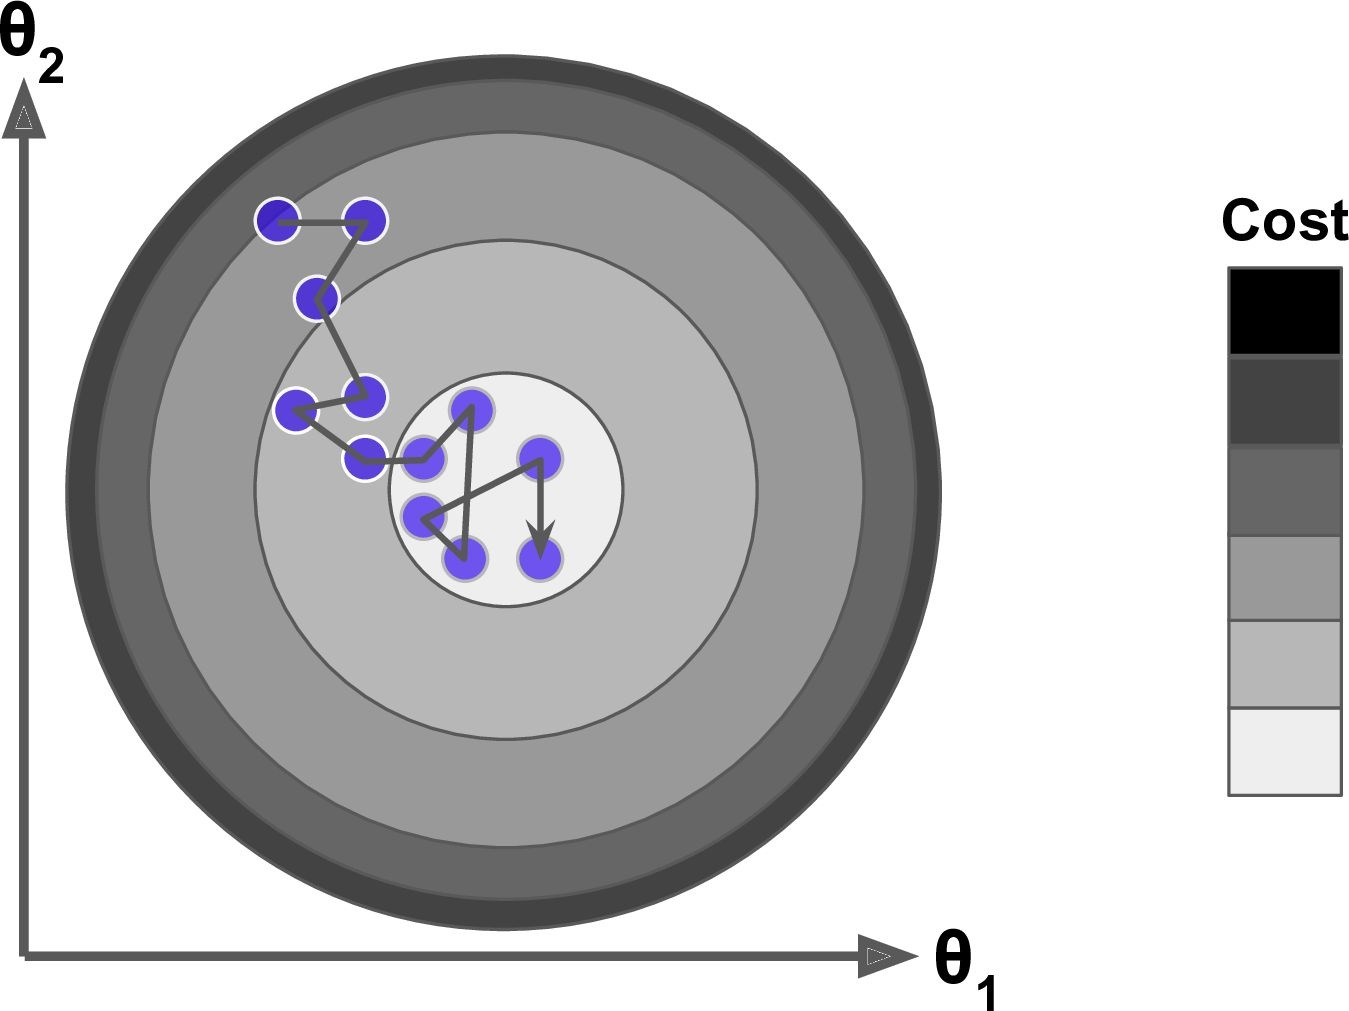

In [120]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/SGD1.png')


__Q3: What is simulated annealing means?__

It's a process of gradually reduce the *learning rate*, first makeing the steps large to escape the **local minumum** and then make **steps** smaller and smaller to settel down at **global minimum**

__Q4: What is learning schedule?__

It's the function used in simulated annealing process to determine the best *learning rate* at each *iteration*, by not reduceing **lr** too quickly that you may get stuck in **local minimum** or on the way to it, and not too slow that keep the jumping for longer time and may end up with suboptimal solution

**The implementation of Stochastic Gradient Descent usning simple learning schedule function:**

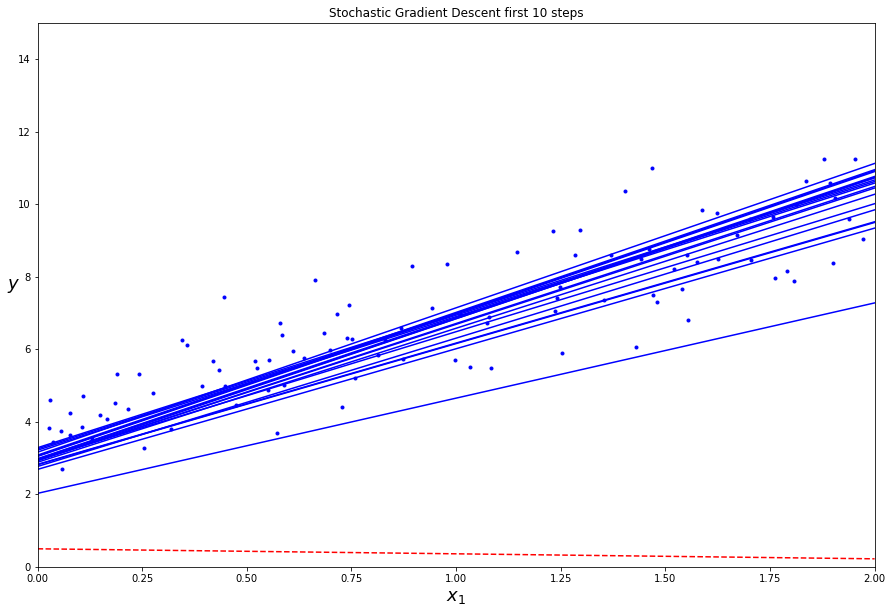

The length of theta_path_sgd list = number of epochs * norm of training data (m) = 50 * 100 =   5000


In [156]:
theta_path_sgd = []
#setting the traning dataset - number of rows
m = len(X_b)
# make it static
np.random.seed(42)
#number of iterations:
n_epochs = 50
# learning schedule hyperparameters - 2 hyperparameters 
t0, t1 = 5, 50 
# t0 = norm of training data (m) / norm of instance (i), 100/20 = 5
# t1 = t0 * number of steps, 5 * 10 = 50


#learning schedule function # t= number of epoch * norm of m + norm of instance
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization
#change the figure size
plt.figure(figsize=(15,10))

#first for loop to go through 50 epoch, each epoch run with single instance of training data 
#50 epoch = 50 instance of training data
for epoch in range(n_epochs):
    for i in range(m):
        #make a prediction 
        if epoch == 0 and i < 20:                    # not shown in the book
            #dot product, multiplication of two arrays
            #X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        #pick random instance from training data using Numpy
        random_index = np.random.randint(m)
        #X_b = np.c_[np.ones((100, 1)), X] ## add x0 = 1 to each instance
        xi = X_b[random_index:random_index+1]
        #print(xi)
        #y = 4 + 3 * X + np.random.randn(100, 1)
        yi = y[random_index:random_index+1]
        #print(yi)
        ##Calculate the Gradient vector of the cost function
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        #learning rate :
        eta = learning_schedule(epoch * m + i)
        #Calculate the Gradient Descent step
        theta = theta - eta * gradients
        #adding GDS value to the list 
        theta_path_sgd.append(theta)                 # not shown

#plot the data with color blue 
plt.plot(X, y, "b.")                                 # not shown
#set up the x and y labels 
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
#change the coordinates of x and y
plt.axis([0, 2, 0, 15])                              # not shown
#save_fig("sgd_plot")  
plt.title("Stochastic Gradient Descent first 10 steps")
# not shown
plt.show() 

print("The length of theta_path_sgd list = number of epochs * norm of training data (m) = 50 * 100 =  ",len(theta_path_sgd))

- Since **instances** are picked randomly, some instances may be picked several times per **epoch** while others may not be picked at all !.

- **SGDRegressor class:** its **Scikit-Learn module** wich optimizing the squared error cost function

The implementation of **SGDRegressor** as per the follwing 3 lines of codes the function takes 3 parameters **(epoch , penalty, learning rate)**

In [157]:
from sklearn.linear_model import SGDRegressor
#penalty : added to the loss function that shrinks model parameters towards the zero vector using 
#either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net) or None.
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [158]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.8616392]), array([3.08611296]))

**Comparasion:** 
Stochastic Gradient Descent got the same **theta** results as Normal Equation.

<br>

# Mini-batch Gradient Descent

Unlike **BGD** which compute the gradients based on *full training set*, or just *one instance* as in **SGD**, the **Mini-batch Gradient Descent** computes all gradients on small random sets of instances called *mini-batches* 

**- Mini-batch GD** gives better performance boost than **SGD**, especially when using GPUs, and the parameter space is less erratic than with SGD, especially with large *mini-batches*
- **Mini-batch GD** end up walking around bit closer to **minimum** than **SGD**,but maybe harder to escape from **local minima**
- **SGD** and **MbGD** reach the **minimum** if a good **leaning schedule** used. 
- the below figure showes three GD algorithm in parameter space, only **BGD** stops at the minumum while **SGD** and **M-bGD** continue to walk around

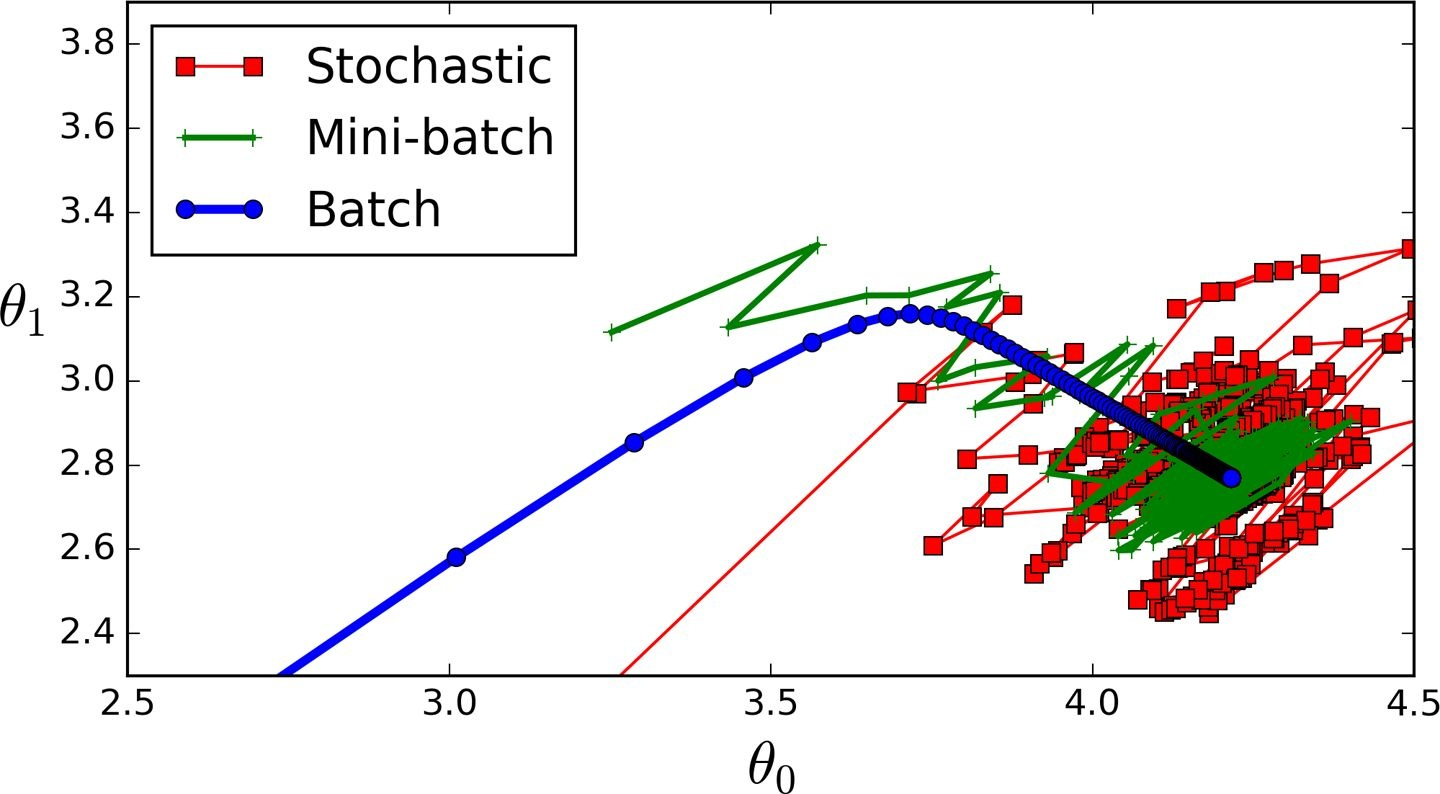

In [161]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/B-S-M_GD.png')

**Comparision of algorithms for Linear Regression:** 
There is almost **no difference** after training, all these algorithms end up with very similar models and make predictions in exactly
the same way

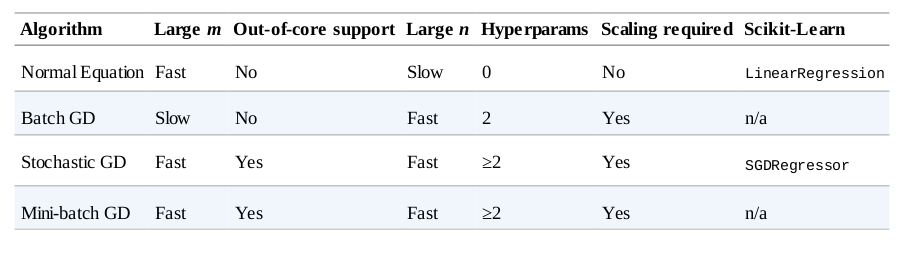

In [163]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/Comparasion.png')

<br>

# Polynomial Regression

It's technique that uses **linear model** to fit **nonlinear data** by adding powers of each feature as new features 

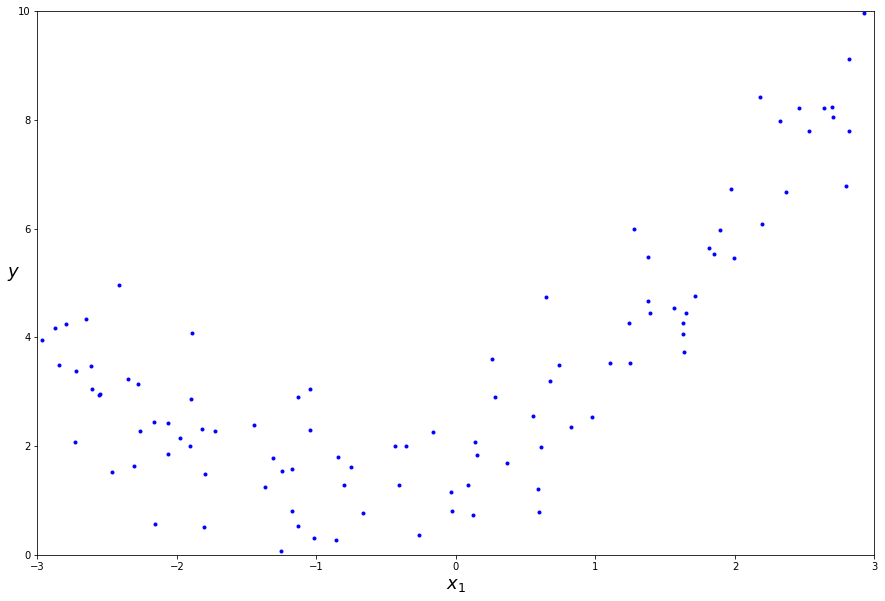

In [182]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.figure(figsize=(15,10))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_data_plot")
plt.show()


**Result:** as you can see in that plot, the data is ploted in way which **linear regresion** can't fit properly, we can use **Polynomial regression** that uses linear model to fit **nonlinear data**. 

The equivalent code using **Scikit-learn** will be as per the following:

In [188]:
from sklearn.preprocessing import PolynomialFeatures
#use PolynomialFeatures function to generate new feature matrix without bias
#consisting of all polynomial combinations of the features up to the given degree(power of feature), 
#in our code we have 2 features x and y
#default degree = 2 quadratic regression [x,x^2] , in case degree = 3 means cubic [x,x^2,x^3]... 
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#use fit_transform : is used for the initial fitting of parameters on the training set x, 
#but it also returns a transformed x′ = (x-mean)/sd that centered the training data 
# it just calls first fit() and then transform() on the same data.
X_poly = poly_features.fit_transform(X) 
#check first value in x feature and compare it with X_pol
X[0]


array([-0.75275929])

In [189]:
#X_pol contain the original feature of x plus the x^2(2nd-degree polynomial)
#-0.75275929 is first value x feature and 0.56664654 is value of x^2  
X_poly[0]

array([-0.75275929,  0.56664654])

In [183]:
#using linear regression to create a modeel that fit nonlinear data 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

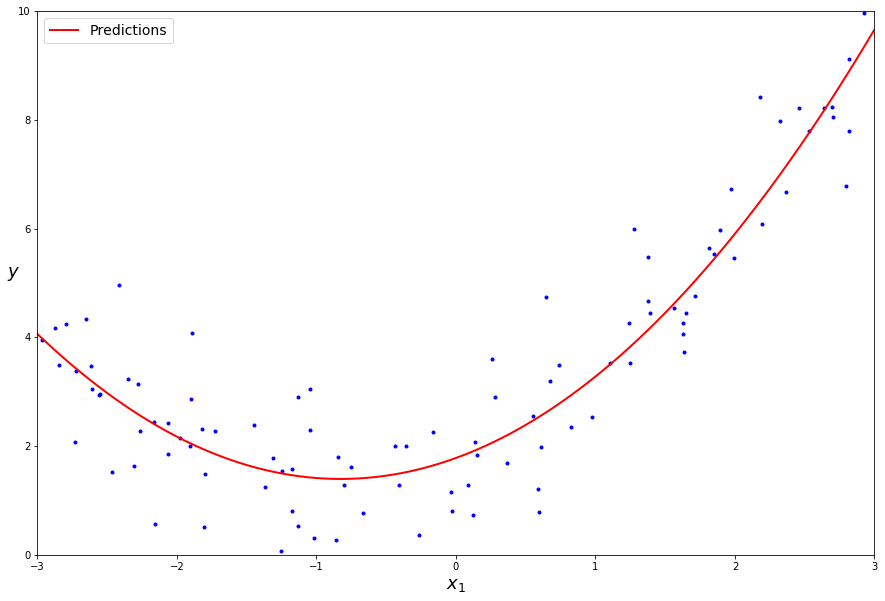

In [201]:
#generate an array of random values btw [-3,3] with 100 rows and 1 column 
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
#returns a original feature of X_new plus transformed X_new′ = (X_new - mean)/sd that centered the training data 
X_new_poly = poly_features.transform(X_new)
#return predicted y, given X_new_poly observations
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(15,10))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
#plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

**Comparasion:** when there are *multiple features*, **Polynomial Regression** is capable of finding relationships between features, unlike **linear Regression**.

<br>

# Learning Curves

Using **high degree Polynomial Regression** will maybe fit the training data much better than **Linear Regression**
the below plot shows the comparasion between **300-degree polynomial model** with **linear** and **quadratic** models 

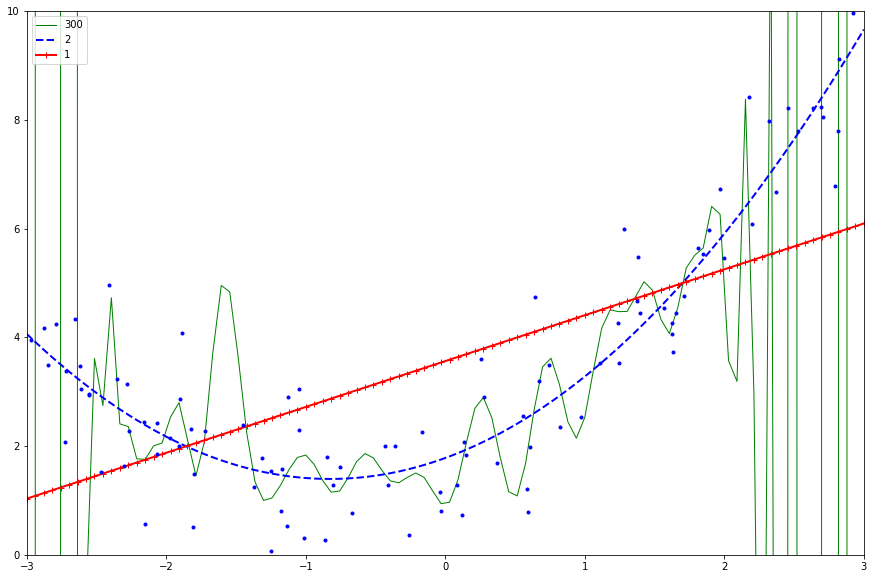

In [209]:
#StandardScaler: Standardize features by removing the mean and scaling to unit variance similar to MinMaxScaler
from sklearn.preprocessing import StandardScaler
#Pipeline: pipeline of transforms with a final estimator,
#to assemble several steps that can be cross-validated together while setting different parameters
from sklearn.pipeline import Pipeline

plt.figure(figsize=(15,10))
#style : color , width: size of the curve/line , degree: quadratic or linear or 300! :)
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    #generate new feature matrix without bias given the degree
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    #standardize features , mean=0 , sd=1
    std_scaler = StandardScaler()
    ##using linear regression to create a modeel that fit nonlinear data 
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    #calling the function for fitting the polynomial model
    #X = 6 * np.random.rand(m, 1) - 3
    #y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
    polynomial_regression.fit(X, y)
    #predict with test data X_new array 
    #X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    y_newbig = polynomial_regression.predict(X_new)
    #plot X_new feature against predicted feature
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
#plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("high_degree_polynomials_plot")
plt.show()

Restult: 
- **Polynomial Regression** model*(green curve)* is **overfitting** the training data while the **linear model**(*red dashed line*) **underfitting** it
- **Quadratic model** *(blue dashed curve)* will generalize best in this case



**Q5: How can you tell that your model is simple or complex?,and if model is overfitting or underfitting the data?
**
- By using **Cross-Validation** to estimate the model's generalization performance
   
   **- Overfitting:** when the model performs well on training data and gerneralizes poorly according to CV metrics *(too complex model)*
   
   **- Underfitting:** when the model both perfoms and generalizes poorly *(too simple model)*


- Or by looking at **learining curves** and compare the plots of the model's performance on training and validation sets, by looking to the below learning curves **(red,blue)** of **Linear Regression** model:
     
     **- The training curve(red)** starts at **0** which means model can fit perfectly with **1** or **2 instances** in training set, and adding **3rd instance** will not help to get a better fitted model as the data is **nonlinear** with **noise**, and will not make **RMSE** better or worse, so better to use more **complex model** or better features
     
     **- The validation curve(blue)** has big **RMSE** and starts to go down when the model learn more training instances 
     
     **- Both curves** are example of **underfitting model**

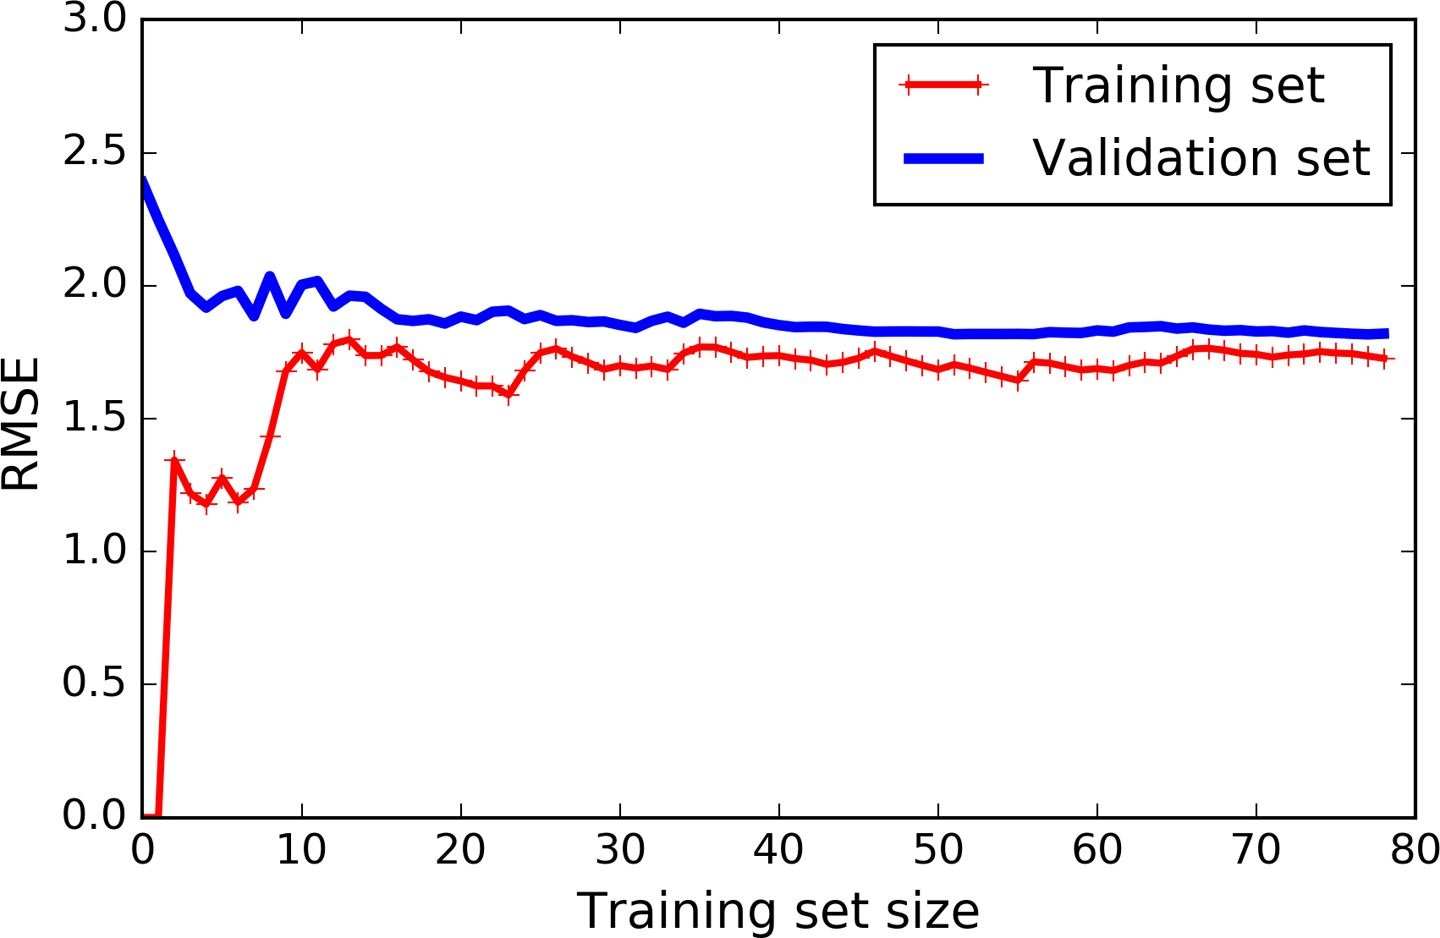

In [210]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/LC.png')

<br>

The below figure indicates the learning curves of 10-degree **Polynomial model** on same data and it looks a bit like **Linear Regression model**

**Polynomial model** VS **Linear Regression**:
 - **Error** (reduced to around 1) on trainig data is much lower than Error (reduced to around 1.8) with **Linear Regression** model
 - **Gab** between curves, which means model perform better on training data than on validation one => **overfitting model**, while its **underfitting** with **Linear Regression** model
 - Learning curves of **Polynomial model** continue to get closer in case large training data used

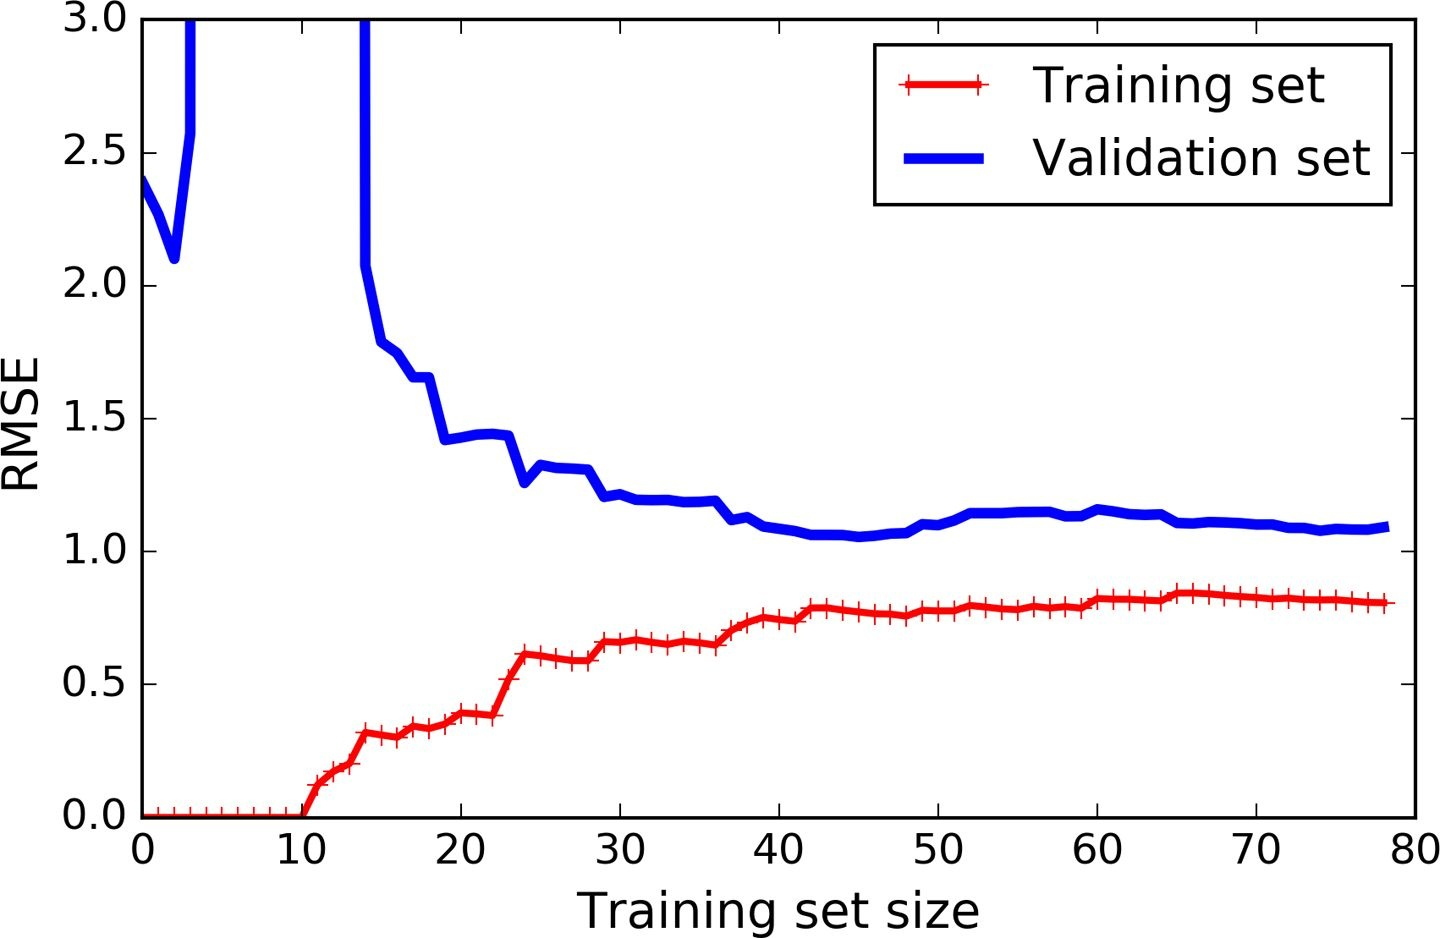

In [212]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/LC_Poly.png')

<br>

<br>

# Regularized Linear Models

- Regularize Linear model is a good way to **reduce overfitting**.

- the **fewer** *degree of freedom* it has, the harder will be to **overfit** the data

- regularize Polynomial model require *reduce* in number of **Polynomial degrees**

- regulaize Linear Model achieved by constraining the **weight** of the model

- **3** different ways to constrain the **weights**:
    
    **- Ridge Regression**
    
    **- Lasso Regression**
    
    **- Elastic Net **

## Ridge Regression 

- Is Regularized version of **Linear Regression**

- **Regularization term which added to the cost function during training  = **


    - Where $θ$ is vector of *feature weight* and $α$ hyperparameter is to control regularize the model
    
        - If $α$ = 0 => **Ridge Regression is Linear Regression** 
        
        - If $α$ VERY large => all **weights** end up very close to 0 and flat line cross the data's mean
   
    - **Learning algorithm** will fit the data and keep the model weights as small as possible
    
    - evaluate the model's performance using unregularized performance measure


- **Scale** your data before performing **Ridge Regression** 


- **Ridge Regression cost function equation:**
    
    - $θ0$ or bias ,is not regularized (starts with **i =1**, not **0**)
    
    - **Weight vector** w = $θ1$ to $θn$, w can be defined as the vector of feature weights then 
      the Regularization term = $1⁄2(∥ w ∥2)^2$ , where $∥ w ∥2$ is norm of the weight vector w
      
    - It uses the squared euclidean **$l2$** of the weight vector  

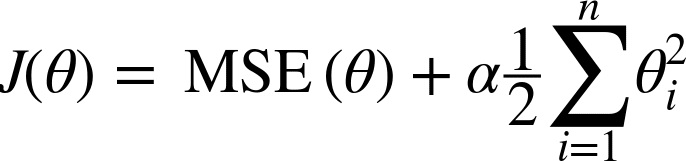

In [213]:
 Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/RR.png')

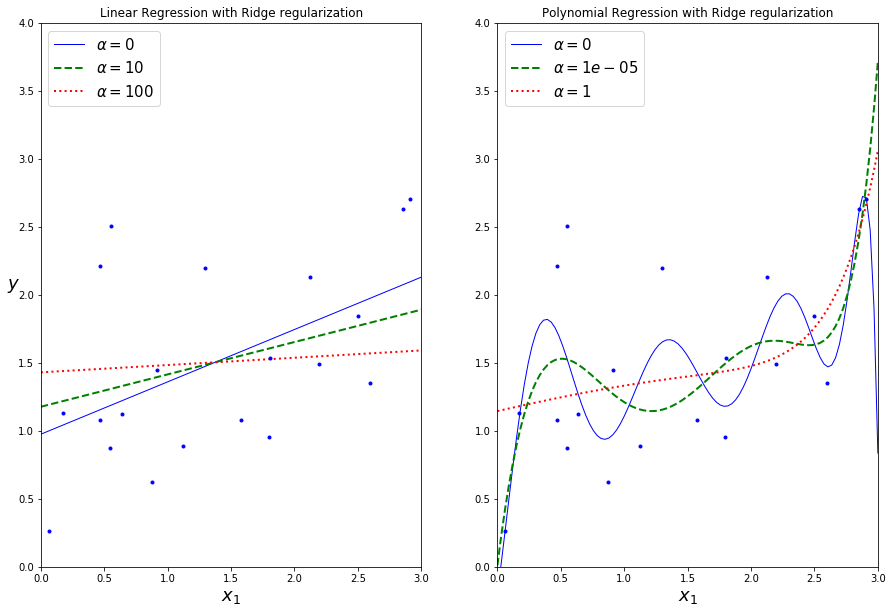

In [226]:
from sklearn.linear_model import Ridge

np.random.seed(42)
#number of observation 
m = 20
# generate training data
X = 3 * np.random.rand(m, 1)
# random initialization
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
# generate an test array of random values btw [0,3] with 100 rows and 1 column 
X_new = np.linspace(0, 3, 100).reshape(100, 1)

#function that takes 4 parameters 
# - model_calss = Ridge                        - polynomial = true or false
# - alphas = control regularize the model      - model_kargs = random_state 42 to get the same output every split
#                                              - ** keyword argument unpacking data structure

def plot_model(model_class, polynomial, alphas, **model_kargs):
    # blue , green and red colors for alpha curves 
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        #create the model , if alpha = 0 then its linear Regression 
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        # Polymnomial Regression
        if polynomial:
            #Pipeline: pipeline of transforms with a final estimator
            model = Pipeline([
                    #degree(power of feature, i.e x ^ 10), no bias/X0 
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        #fitting the model
        model.fit(X, y)
        #apply model with test data X_new - prediction
        y_new_regul = model.predict(X_new)
        #line width = 2 for Polynomial , and =1 for Linear Regression
        lw = 2 if alpha > 0 else 1
        #plot the test data against y-hat
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Linear Regression with Ridge regularization")
#calling the function -  Linear Regression 
#alpha values = 0, 10 , 100 
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plt.title("Polynomial Regression with Ridge regularization")
# calling the funtion - Polynomial Regression  
# alpha values = 0 , 0.00001 , 1 
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

#save_fig("ridge_regression_plot")
plt.show()

#or use Ridge module from Scikit-Learn using closed-form solution
#from sklearn.linear_model import Ridge
#ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
#ridge_reg.fit(X, y)
#ridge_reg.predict([[1.5]])

#sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
#sgd_reg.fit(X, y.ravel())
#sgd_reg.predict([[1.5]])

#ridge_regridge_re  = Ridge(alpha=1, solver="sag", random_state=42)
#ridge_reg.fit(X, y)
#ridge_reg.predict([[1.5]])

With **Linear Regression**, we can perform __Ridge Regression__ either by computing a *closed-form equation*(The *Normal Equation*) or by performing *Gradient Descent* 

<br>

## Lasso Regression 

- It is a regularized version of **Linear Regression**, it adds a regularization term to the cost function just like **Ridge Regression**, but it uses **$l1$** absolute norm of the weight vector instead of **$l2$** 

- **Lasso Regression cost function:**

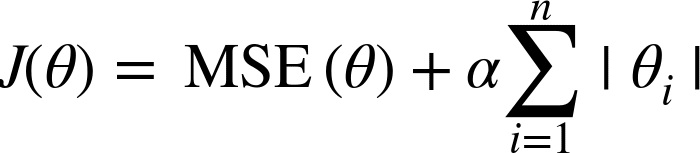

In [242]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/LAS.png')

Replace Ridge model with Lasso model and uses smaller $α$ values by calling **plot_model** function and pass *Lasso* as model_class parameter:

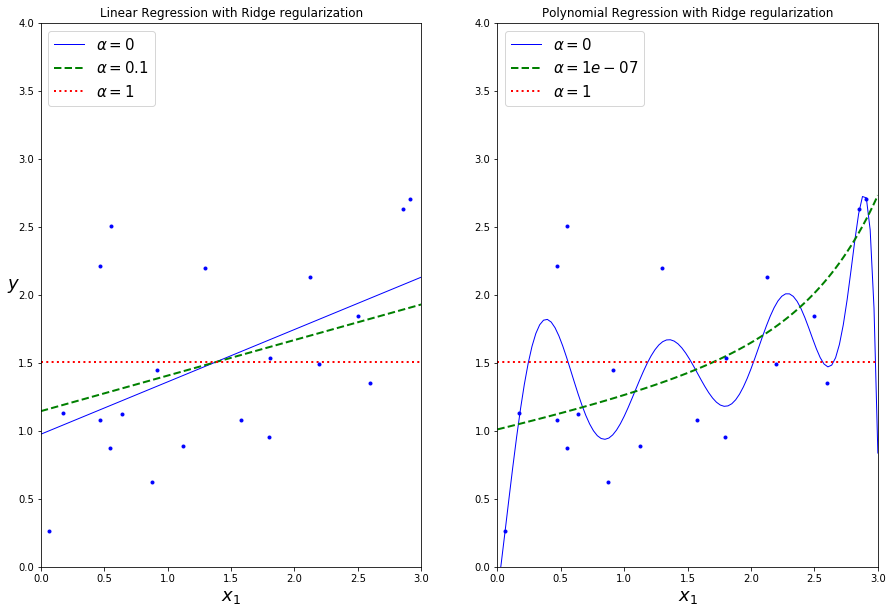

In [251]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Linear Regression with Ridge regularization")
#calling the function -  Linear Regression 
#alpha values = 0, 0.1 , 1 
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plt.title("Polynomial Regression with Ridge regularization")
# calling the funtion - Polynomial Regression  
# alpha values = 0 , 0.00000001 , 1
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
#save_fig("lasso_regression_plot")
plt.show()

Result:

- **Lasso Regression** eliminate the weights of the least important features (i.e set them to 0)

**Q6: Why the Polynomial model with $α$ = $0.00000001$ (green dashed line) looks *quadratic*, almost *linear*?**

Becouse **Lasso Regression** performs feature selection and outputs a **spare model** with *few nonzero feature weights* since all the weights of high-degree are set to 0

**Comparasion:**


The below figure is comparing between **Lasso Regression** and **Ridge Regression**:


- ***On top left plot***, the **background ellipses** represent unregulized MSE cost function ($α$ = 0) and **foreground diamonds** represent *absolute norm* $l1$ (penalty) of weight vector, the **triangles** show BGD path for this penalty. The **white circules** show BGD path with that cost function as we can see the path first reaches $θ1 = 0$ then starts to roll down a tunnel until reaches $θ2 = 0$


- ***On the top right plot***, same as left represent cost function and *absolute norm* $l1$ with $α$ = 0.5


- The **global minimum** is on the $θ2 = 0$


- The other **two bottom plots** show the same thing but with squared euclidean $l2$ penalty instead

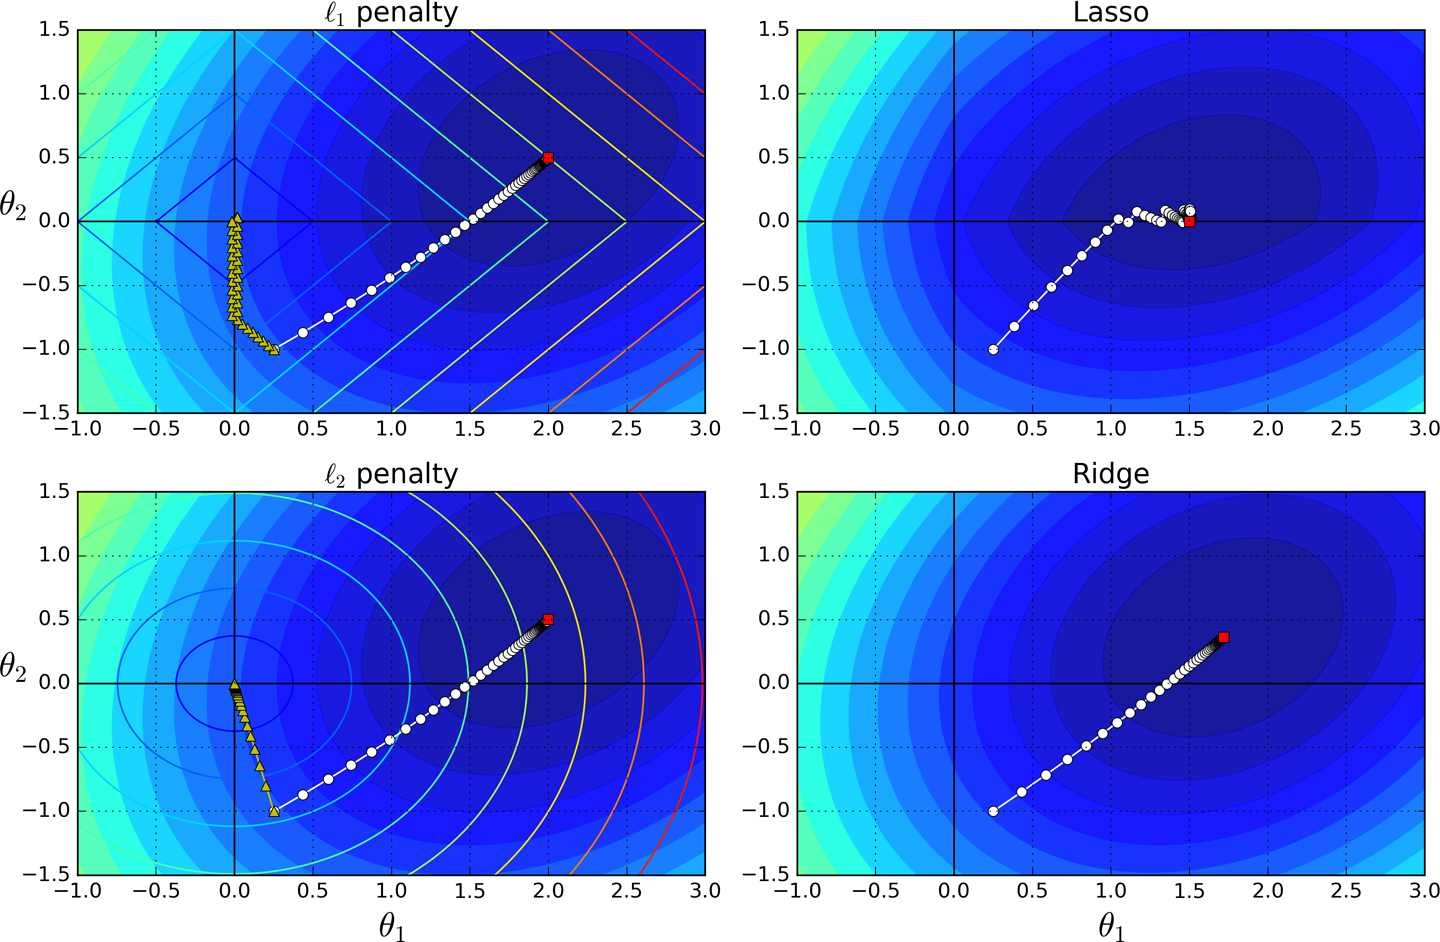

In [252]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/lasso_ridge.png')

<br>

## Elastic Net

- It's regularization term is simple mix of both **Ridge regularization terms** and **Lasso regularization terms** by controling the *mix ratio* $r$
    - **$r = 0$**, Elstic Net = Ridge Regression 
    
    - **$r = 1$**, Elstic Net = Lasso Regression


- The equation of Elastic Net cost function:

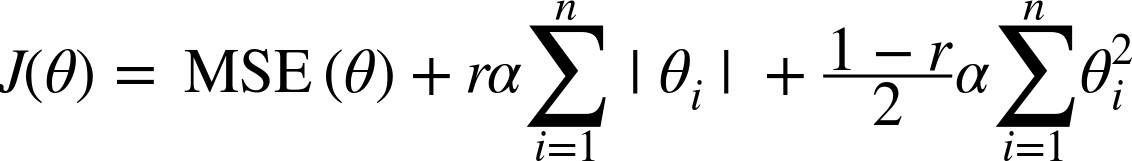

In [253]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/EN.png')

**Q7: When should you use Linear Regression, Ridge, Lasso or Elastic Net?**

- Generally you should *avoid* plain **Linear Regression** 


- **Ridge** is *good default* but keep in you mind that Ridge use all features that might some of these features be **useful** and other might be **useless**!


- Lasso *reduce* these **useless** features weights down to 0 but Lasso may behave erratically when 
    
    - Number of features > number of training instances 
    
    - Several features are strongly correlated
    
- Elastic Net is same as Lasso, but preferred over Lasso  

**The simple implementation of Lasso, Ridge and Elastic Net as per the following code:**

In [270]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso = lasso_reg.predict([[1.5]])


from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge = ridge_reg.predict([[1.5]])

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elestic_net = elastic_net.predict([[1.5]])

print(" lasso _reg : ", lasso," \n","ridge _reg : ", ridge, " \n","elestic_net : ", elestic_net)

 lasso _reg :  [1.53788174]  
 ridge _reg :  [[1.55071465]]  
 elestic_net :  [1.54333232]


<br>

## Early Stopping 

reqularize iterative learning algorithms such as **Gradient Descent** is to stop training as soon as the validation error reaches a minimum and stops devreasing and maybe starts to go back up, which means that the model stared to overfit the training data 

- **Geoffery Hinton** - psychologist and computer scientist and author of * Neural Network Architectures for Artificial Intelligence* book, called it **"beautiful free lunch"**

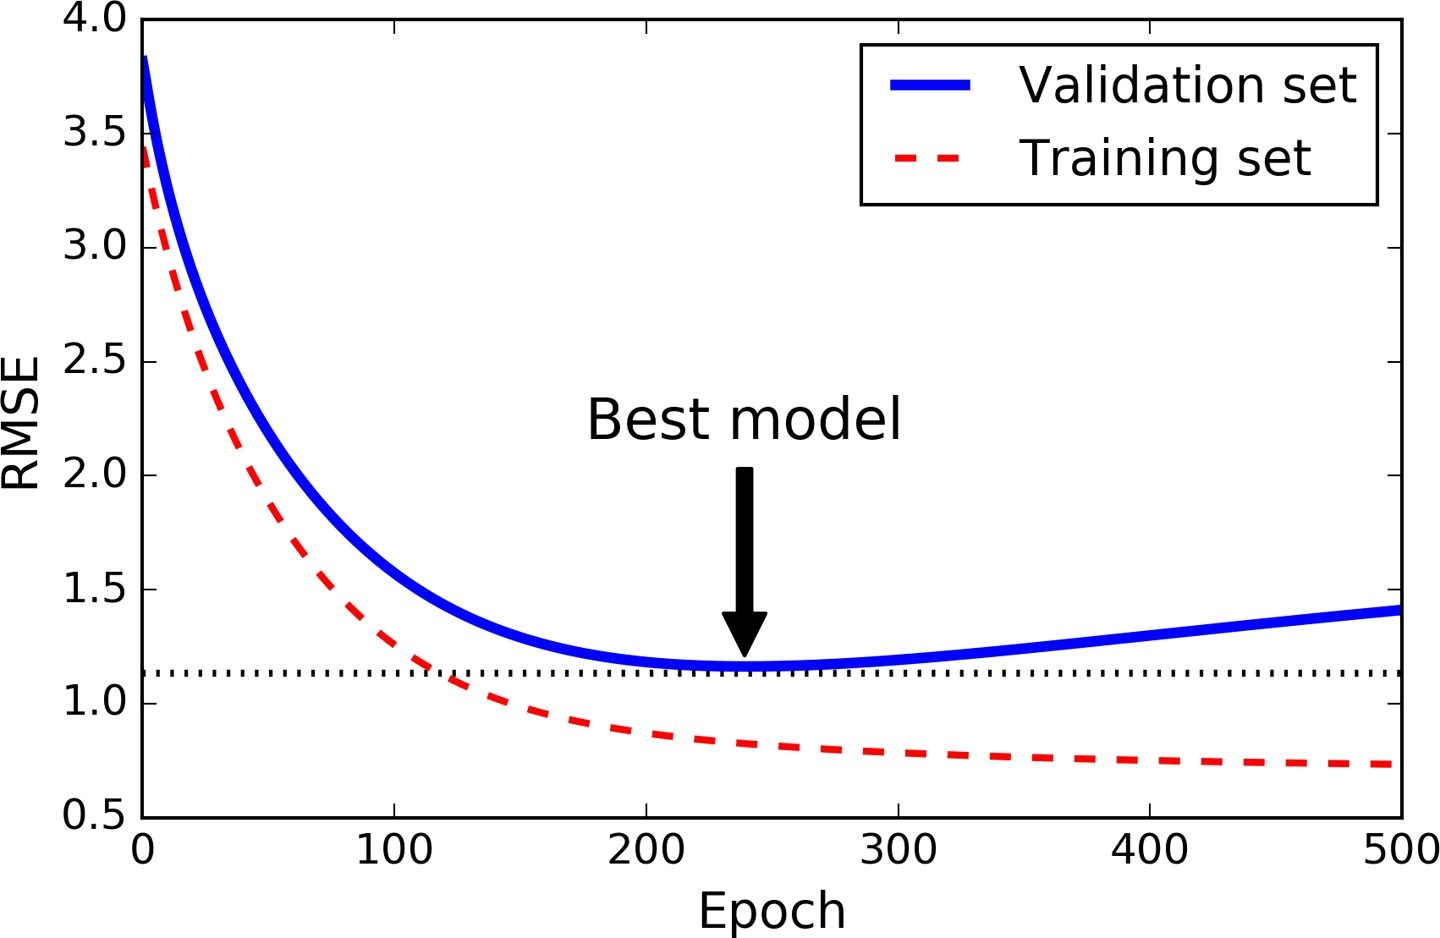

In [271]:
Image(filename='/home/basem/Desktop/MyFiles-basem/beuth/Semester 2/Data Science Applications and Workflow/ES.png')